# Чтение данных

In [2]:
def extract_chapters(book_file_name, print_report=True):
    """
    Extracting paragraphs from single book text file 
    
    Parameters
    ----------
    book_file_name : String
        book contents file
        
    print_report : Boolean
        flag for printing parse book statistics
    
    Returns
    -------
    chapters : List[(String. String)]
        list of chapters tuples: (chapter header, chapter content)
    """
    with open(book_file_name, 'r') as input_file:
        book = (input_file
                  .read()
                  .decode('cp1251')
                  .replace('\n\r', '\n'))
    
    book_without_intro = book.split('\n\n\n\n\n\n\n\n\n\n\n\n')[-1]

    chapters = []
    for i, split in enumerate(book_without_intro.split('\r\n\n\n\n\n')):
        header = split.split('\r\n')[0].replace('\n','')
        content = '\n'.join(split.split('\r\n')[1:])
        if header == u'Приложение' or header == u'Приложения' :
            break
        if header:
            chapters.append((header, content))

    if print_report:
        print 'Total chapters: %d' % len(chapters)
        enumerated_chapters = list(enumerate(chapters))
        for i, chapter in enumerated_chapters[:5]:
            print '%d.' % i, chapter[0], len(chapter[1])
        print '...'
        for i, chapter in enumerated_chapters[-5:]:
            print '%d.' % i, chapter[0], len(chapter[1].split(' '))

    return chapters

In [4]:
book_1_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya1._Igra_Prestolov.txt')

Total chapters: 73
0. Пролог 20317
1. Бран 15904
2. Кейтилин 11034
3. Дейенерис 22567
4. Эддард 20851
...
68. Дейенерис 3273
69. Тирион 2738
70. Джон 3909
71. Кейтилин 3641
72. Дейенерис 2738


In [6]:
book_2_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya2._Bitva_Koroleyi.txt')

Total chapters: 70
0. Пролог 52061
1. Арья 12324
2. Санса 24389
3. Тирион 30073
4. Бран 18397
...
65. Санса 2294
66. Теон 2757
67. Тирион 2028
68. Джон 2525
69. Бран 2492


In [7]:
book_3_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya3._Burya_Mecheyi.txt')

Total chapters: 83
0. По поводу хронологии 732
1. Пролог 31716
2. Джейме 27328
3. Кейтилин 17943
4. Арья 17551
...
78. Тирион 3091
79. Сэмвел 3487
80. Джон 2922
81. Санса 4972
82. Эпилог 3626


In [8]:
book_4_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya4._Pir_Stervyatnikov.txt')

Total chapters: 47
0. Пролог 30418
1. Пророк 28324
2. Капитан гвардии 34172
3. Серсея 22147
4. Бриенна 31578
...
42. Бриенна 4126
43. Серсея 4907
44. Джейме 4308
45. Сэмвел 3901
46. А на Стене в это время… 167


#### something wrong with the last chapter, dropping it:

In [9]:
book_4_chapters = book_4_chapters[:-1]

In [11]:
book_5_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya5._Tanec_S_Drakonami_Kniga_1.txt')

Total chapters: 38
0. Хронологическая справка 1193
1. Пролог 25389
2. Тирион 29923
3. Дейенерис 31014
4. Джон 27786
...
33. Вонючка 3921
34. Тирион 3825
35. Бран 3975
36. Джон 3338
37. Дейенерис 3065


#### we does not want this first chapter, dropping it:

In [12]:
book_5_chapters = book_5_chapters[1:]

In [13]:
book_6_chapters = extract_chapters('data/SongOfIceAndFire_content_files/Martin_D._Pesnldaiognya5._Tanec_S_Drakonami_Kniga_2.txt')

Total chapters: 36
0. Принц Винтерфелла 29760
1. Страж 25832
2. Джон 16845
3. Тирион 20031
4. Переметчивый 22367
...
31. Укротитель драконов 2584
32. Джон 3897
33. Десница королевы 4106
34. Дейенерис 3775
35. Эпилог 4518


# Creating documents from chapters

In [14]:
books = [
    book_1_chapters,
    book_2_chapters,
    book_3_chapters,
    book_4_chapters,
    book_5_chapters,
    book_6_chapters
]

#### Creating list `docs` with documents and list `book_chapters_list` with chapters meta-info with same indexing for further processing

In [36]:
docs = []
book_chapters_list = []

for book_number, book_chapters in enumerate(books):
    for chapter_number, chapter in enumerate(book_chapters):
        docs.append(chapter[1])
        book_chapters_list.append((book_number, chapter_number, chapter))
    
print 'Number of documents: %d' % len(docs)

Number of documents: 345


# Transform documents to vectors

### Helper functions to filter out non-letters, lower-casing, etc.

In [50]:
import re
non_letter_rgxp = re.compile(u'[^а-яА-Я ]')

def remove_non_letters(string):
    return non_letter_rgxp.sub(' ', string)

### Stemming

In [31]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")

def stem(tokens):
    return (stemmer.stem(t) for t in tokens)

### Creating `words_black_list` of meaningless words to filter them out

In [51]:
with open('data/conjunctions.txt', 'r') as f:
    conjunctions_str = f.read().decode('utf-8')
    conjunctions = [s for s in stem(remove_non_letters(conjunctions_str).split()) if s]

with open('data/pronouns.txt', 'r') as f:
    pronouns_str = f.read().decode('utf-8')
    pronouns = [s for s in stem(remove_non_letters(pronouns_str).split()) if s]

words_black_list = set(pronouns) | set(conjunctions)

### Splitting docs into words (tokens)

In [108]:
docs_tokens = [
    list(filter(
            lambda w: w and w not in words_black_list and len(w) > 2, 
            stem(remove_non_letters(doc.lower()).split(' '))))
    for doc in docs
]

### Calculating words (tokens) frequency

In [110]:
import collections

token_frequency_dict = collections.defaultdict(lambda: 0)
for tokens in docs_tokens:
    for t in tokens:
        token_frequency_dict[t] += 1
        
print 'Number of unique words: %d' % len(token_frequency_dict)

Number of unique words: 27516


### Transforming documents (as lists of words) into sparse matrix

In [111]:
import itertools
import scipy as sp

def flatten(iterators_iterator):
    """
    Chaining iterator of iterators into one iterator
    """
    return itertools.chain.from_iterable(iterators_iterator)


class Doc2Vec(object):
    """
    Class for transformation: 
        1. list of words (document) to vector
        2. list of lists of words (corpus) to sparse matrix
    """
    def __init__(self, tokens):
        """
        Parameters
        ----------
        tokens : iterator
            iterator of possible words, used for further trasformations
        """
        self.id_token_dict = dict(enumerate(tokens))
        self.token_id_dict = dict(((v, k) for k, v in self.id_token_dict.items()))
       
    def doc2vec(self, doc_tokens):
        """
        Transform list of words (document) to vector
        
        Parameters
        ----------
        doc_tokens : iterator
            document words
            
        Returns
        -------
        document vector as list of tuples: [(word int id, word frequency)]
        """
        id_cnt_dict = collections.Counter((self.token_id_dict[t] for t in doc_tokens))
        return list(id_cnt_dict.items())
    
    def docs2csr_matrix(self, docs_tokens):
        """
        Transform list of words (document) to vector
        
        Parameters
        ----------
        docs_tokens : iterator of iterators
            documents words
            
        Returns
        -------
        corpus matrix as sp.sparse.csr_matrix
        """
        docs_vecs = [self.doc2vec(doc_tokens) for doc_tokens in docs_tokens]
        data = list(flatten((((id_cnt[1] for id_cnt in doc_vec) for doc_vec in docs_vecs))))
        row_ind = list(flatten((((doc_ind for id_cnt in doc_vec) for doc_ind, doc_vec in enumerate(docs_vecs)))))
        col_ind = list(flatten((((id_cnt[0] for id_cnt in doc_vec) for doc_vec in docs_vecs))))
        return sp.sparse.csr_matrix((data, (row_ind, col_ind)), dtype=float)
        

### Vectorization

In [112]:
tokens = set(flatten(docs_tokens))
doc2vec = Doc2Vec(tokens)

X = doc2vec.docs2csr_matrix(docs_tokens)

print 'Corpus matrix of size %dx%d' % X.shape

Corpus matrix of size 345x27516


# TFIDF

### Very simple `tfidf` function

In [113]:
import numpy as np

def tfidf(X):
    idf = np.log((X.shape[0] + 1) * 1. / ((X > 0).sum(0)) + 1) + 1.
    idf = sp.sparse.spdiags(np.array(idf)[0], diags=0, m=X.shape[1], n=X.shape[1])
    X_tfidf =  X * idf
    return X_tfidf

In [114]:
X_tfidf = tfidf(X)

# SVD

#### Aplying SVD just to look at singular values

In [115]:
import scipy.sparse.linalg
U, S, Vt = sp.sparse.linalg.svds(X_tfidf, k=100)

import numpy as np
U = np.fliplr(U)
S = S[::-1]
Vt = Vt[::-1]

## Barchart plotting function

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 11)

def barchart(y = [3, 10, 7, 5, 3, 4.5, 6, 8.1], log=False):
    if log:
        y=np.log(1 + y)
    N = len(y)
    x = range(N)
    width = 1/1.5
    plt.bar(x, y, width, color="blue")

    plt.show()

#### Plotting singular values barchart

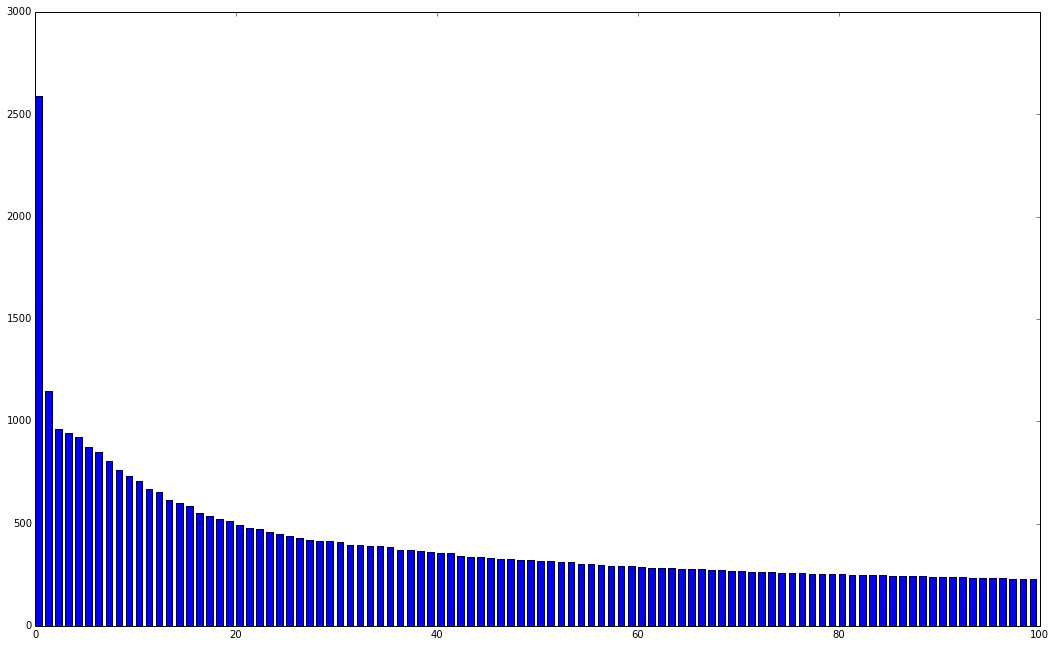

In [117]:
barchart(S)

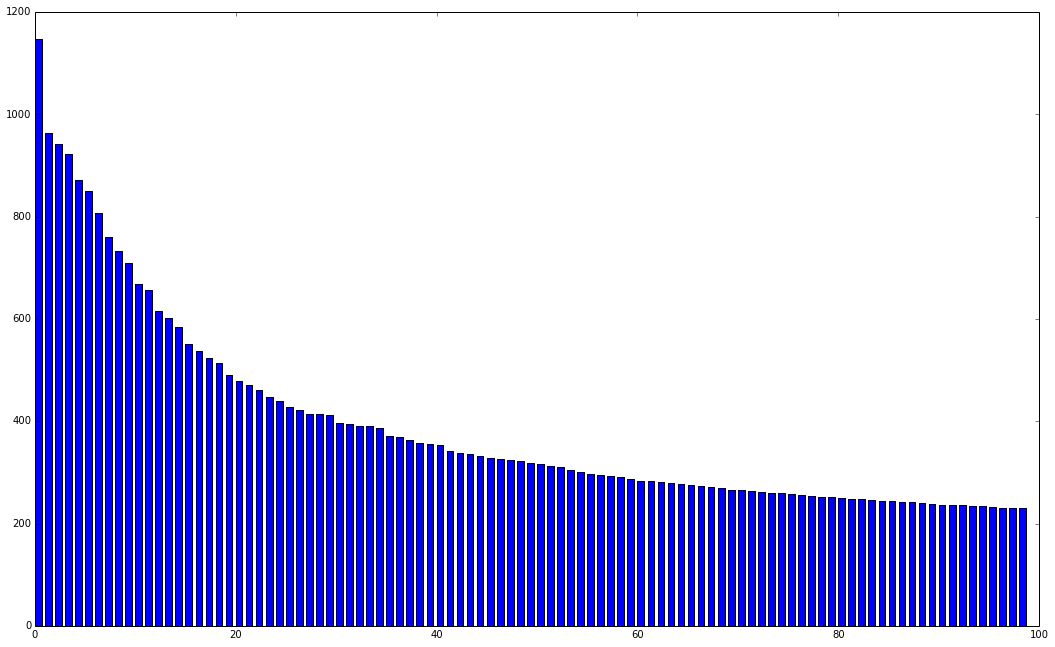

In [118]:
barchart(S[1:])

# Results analysis

#### Helper class to transforming SVD results back into terms of "words" and "documents"

In [119]:
class LSAPrinter(object):
    def __init__(self, U, S, Vt, id_token_dict):
        self.U = U
        self.Vt = Vt
        self.S = S
        self.US = self.U * self.S
        self.id_token_dict = id_token_dict
        
    def _format_weighted_token(self, token, weight):
        return '%+.2f*%s' % (weight, token)
        
    def _tokens_as_string(self, weigthed_tokens):
        return ' '.join([self._format_weighted_token(self.id_token_dict[tw[0]], tw[1]) for tw in weigthed_tokens])
        
    def top_topic_tokens_as_string(self, topic_index, topn=10, sign=1.):
        top_weighted_tokens = sorted(enumerate(self.Vt[topic_index]), key=lambda kv: -np.abs(kv[1]))[:topn]
        top_weighted_tokens = [(tw[0], tw[1] * sign) for tw in top_weighted_tokens]
        return ' '.join([self._format_weighted_token(self.id_token_dict[tw[0]], tw[1]) for tw in top_weighted_tokens])
        
    def top_positive_topic_tokens_as_string(self, topic_index, topn=10):
        top_weighted_tokens = sorted(enumerate(self.Vt[topic_index]), key=lambda kv: -kv[1])
        top_weighted_tokens = filter(lambda kv: kv[1] > 0, top_weighted_tokens)
        top_weighted_tokens = top_weighted_tokens[:topn]
        return self._tokens_as_string(top_weighted_tokens)
        
    def top_negative_topic_tokens_as_string(self, topic_index, topn=10, sign=1.):
        top_weighted_tokens = sorted(enumerate(self.Vt[topic_index]), key=lambda kv: +kv[1])
        top_weighted_tokens = filter(lambda kv: kv[1] < 0, top_weighted_tokens)
        top_weighted_tokens = top_weighted_tokens[:topn]
        return self._tokens_as_string(top_weighted_tokens)
        
    def top_topic_tokens(self, topic_index, topn=10):
        top_weighted_tokens = sorted(enumerate(self.Vt[topic_index]), key=lambda kv: -np.abs(kv[1]))[:topn]
        if top_weighted_tokens[0][1] < 0:
            top_weighted_tokens = [(tw[0], tw[1] * -1.) for tw in top_weighted_tokens]
        return [(self.id_token_dict[tw[0]], tw[1]) for tw in top_weighted_tokens]
    
    def top_topic_docs_indexes(self, topic_index, topn=10, reverse=False):
        x = self.US[:, topic_index]
        return [kv[0] for kv in sorted(enumerate(x), key=lambda kv: -kv[1], reverse=reverse)[:topn]]

In [145]:
U, S, Vt = sp.sparse.linalg.svds(X_tfidf, k=50)
U = np.fliplr(U)
S = S[::-1]
Vt = Vt[::-1]

lsa_printer = LSAPrinter(U, S, Vt, doc2vec.id_token_dict)

### Helper function to describe topic

In [131]:
W_top = 20
C_top = 15

def describe_topic(topic_index):
    print 'Top %d positive words: %s' % (W_top, lsa_printer.top_positive_topic_tokens_as_string(topic_index, W_top))
    print
    print 'Top %d negative words: %s' % (W_top, lsa_printer.top_negative_topic_tokens_as_string(topic_index, W_top))
    print 
    print 'Top chapters positive:'
    for doc_ind in lsa_printer.top_topic_docs_indexes(topic_index, C_top, reverse=False):
        if len(docs[doc_ind]) > 1:
            book_chapter = book_chapters_list[doc_ind]
            print 'Book %d, Chapter %d, %s' % (book_chapter[0], book_chapter[1], book_chapter[2][0].encode('utf-8'))
    print 
    print 'Top chapters negative:'
    for doc_ind in lsa_printer.top_topic_docs_indexes(topic_index, C_top, reverse=True):
        if len(docs[doc_ind]) > 1:
            book_chapter = book_chapters_list[doc_ind]
            print 'Book %d, Chapter %d, %s' % (book_chapter[0], book_chapter[1], book_chapter[2][0].encode('utf-8'))

## Topics top positive/negative words and chapters

### Topic 0

In [132]:
describe_topic(0)

Top 20 positive words: 

Top 20 negative words: -0.30*был -0.24*лорд -0.21*сказа -0.19*сир -0.15*джон -0.15*тирион -0.14*рук -0.12*корол -0.11*больш -0.10*нег -0.10*говор -0.10*нет -0.10*глаз -0.09*брат -0.09*джейм -0.09*над -0.09*под -0.09*меч -0.08*черн -0.08*сэм

Top chapters positive:
Book 2, Chapter 0, По поводу хронологии
Book 2, Chapter 53, Арья
Book 2, Chapter 59, Тирион
Book 0, Chapter 17, Бран
Book 2, Chapter 51, Арья
Book 1, Chapter 1, Арья
Book 2, Chapter 17, Санса
Book 5, Chapter 23, Отвергнутый жених
Book 0, Chapter 2, Кейтилин
Book 1, Chapter 59, Тирион
Book 1, Chapter 9, Арья
Book 2, Chapter 31, Джон
Book 1, Chapter 60, Санса
Book 0, Chapter 10, Джон
Book 1, Chapter 26, Арья

Top chapters negative:
Book 1, Chapter 0, Пролог
Book 3, Chapter 41, Алейна
Book 2, Chapter 61, Тирион
Book 2, Chapter 20, Тирион
Book 0, Chapter 62, Тирион
Book 1, Chapter 23, Джон
Book 3, Chapter 27, Джейме
Book 0, Chapter 30, Эддард
Book 1, Chapter 42, Давос
Book 0, Chapter 34, Кейтилин
Book 1, 

### Topic 1

In [141]:
describe_topic(1)

Top 20 positive words: +0.52*джон +0.47*сэм +0.12*лилл +0.11*одичал +0.11*крастер +0.10*стен +0.09*дозор +0.09*бран +0.09*манс +0.09*грен +0.09*сно +0.09*ворон +0.08*эйемон +0.08*черн +0.07*мормонт +0.07*тормунд +0.07*игритт +0.06*пип +0.06*снег +0.06*призрак

Top 20 negative words: -0.30*тирион -0.16*сир -0.14*джейм -0.10*санс -0.09*серсе -0.09*бриен -0.07*рыцар -0.06*джоффр -0.06*лорд -0.06*золот -0.06*кейтилин -0.05*давос -0.05*тайвин -0.05*королев -0.04*маргер -0.04*ланнистер -0.04*лед -0.04*роберт -0.04*карлик -0.04*тирелл

Top chapters positive:
Book 3, Chapter 5, Сэмвел
Book 2, Chapter 19, Сэмвел
Book 1, Chapter 23, Джон
Book 2, Chapter 34, Сэмвел
Book 4, Chapter 7, Джон
Book 0, Chapter 52, Джон
Book 3, Chapter 26, Сэмвел
Book 2, Chapter 47, Сэмвел
Book 2, Chapter 16, Джон
Book 2, Chapter 76, Сэмвел
Book 0, Chapter 26, Джон
Book 2, Chapter 56, Джон
Book 0, Chapter 70, Джон
Book 2, Chapter 74, Джон
Book 3, Chapter 15, Сэмвел

Top chapters negative:
Book 2, Chapter 61, Тирион
Book

### Topic 2

In [140]:
describe_topic(2)

Top 20 positive words: +0.66*тирион +0.16*сэм +0.15*джон +0.08*брон +0.08*карлик +0.05*серсе +0.05*тайвин +0.05*варис +0.05*грифф +0.05*санс +0.05*джоффр +0.04*милорд +0.04*шагг +0.04*лилл +0.04*крастер +0.04*мормонт +0.04*джейм +0.04*ланнистер +0.04*хелдон +0.03*отец

Top 20 negative words: -0.48*давос -0.15*ден -0.09*бран -0.09*станнис -0.08*корол -0.08*теон -0.06*дракон -0.06*мелисандр -0.06*бриен -0.06*ходор -0.06*корабл -0.05*виктарион -0.05*салладор -0.05*дрог -0.05*мор -0.05*пилос -0.05*кресс -0.05*кхал -0.04*контрабандист -0.04*величеств

Top chapters positive:
Book 0, Chapter 62, Тирион
Book 2, Chapter 61, Тирион
Book 0, Chapter 38, Тирион
Book 0, Chapter 31, Тирион
Book 2, Chapter 67, Тирион
Book 0, Chapter 21, Тирион
Book 4, Chapter 1, Тирион
Book 1, Chapter 3, Тирион
Book 4, Chapter 27, Тирион
Book 4, Chapter 22, Тирион
Book 2, Chapter 33, Тирион
Book 0, Chapter 42, Тирион
Book 4, Chapter 14, Тирион
Book 2, Chapter 13, Тирион
Book 1, Chapter 25, Тирион

Top chapters negativ

### Topic 3

In [139]:
describe_topic(3)

Top 20 positive words: +0.29*лорд +0.18*давос +0.18*кейтилин +0.12*джон +0.12*алейн +0.11*джейм +0.10*нед +0.10*робб +0.10*санс +0.08*станнис +0.08*бриен +0.08*лед +0.08*петир +0.08*корол +0.07*роберт +0.07*лиз +0.06*фре +0.06*милорд +0.06*теон +0.06*эдмар

Top 20 negative words: -0.46*ден -0.16*дрог -0.16*кхал -0.16*дракон -0.12*джор -0.11*раб -0.10*гиздар -0.09*даар -0.09*миэрин -0.09*визерис -0.09*город -0.09*кхалис -0.08*бельвас -0.08*безупречн -0.08*тирион -0.08*сэм -0.08*астапор -0.07*иллир -0.07*дейенерис -0.07*дотракийц

Top chapters positive:
Book 3, Chapter 41, Алейна
Book 3, Chapter 23, Алейна
Book 3, Chapter 10, Санса
Book 1, Chapter 42, Давос
Book 0, Chapter 59, Кейтилин
Book 0, Chapter 34, Кейтилин
Book 2, Chapter 50, Кейтилин
Book 1, Chapter 39, Кейтилин
Book 0, Chapter 71, Кейтилин
Book 2, Chapter 20, Тирион
Book 2, Chapter 81, Санса
Book 2, Chapter 36, Кейтилин
Book 2, Chapter 37, Давос
Book 1, Chapter 22, Кейтилин
Book 4, Chapter 19, Давос

Top chapters negative:
Book

### Topic 4

In [138]:
describe_topic(4)

Top 20 positive words: +0.56*давос +0.25*тирион +0.23*сэм +0.15*станнис +0.09*мелисандр +0.08*корол +0.07*корабл +0.06*лилл +0.06*салладор +0.05*дракон +0.05*пилос +0.05*акселл +0.05*контрабандист +0.05*кресс +0.04*величеств +0.04*саа +0.04*крастер +0.04*королев +0.04*красн +0.04*штормов

Top 20 negative words: -0.40*бран -0.23*ходор -0.15*кейтилин -0.14*робб -0.13*теон -0.11*бриен -0.10*жой -0.08*лювин -0.06*санс -0.06*уолдер -0.06*мир -0.06*винтерфелл -0.06*был -0.06*волк -0.06*сказа -0.06*лет -0.05*нед -0.05*алейн -0.05*родрик -0.05*джейм

Top chapters positive:
Book 1, Chapter 42, Давос
Book 1, Chapter 58, Давос
Book 1, Chapter 10, Давос
Book 2, Chapter 11, Давос
Book 2, Chapter 37, Давос
Book 2, Chapter 55, Давос
Book 2, Chapter 64, Давос
Book 2, Chapter 26, Давос
Book 4, Chapter 15, Давос
Book 1, Chapter 0, Пролог
Book 4, Chapter 9, Давос
Book 2, Chapter 6, Давос
Book 3, Chapter 5, Сэмвел
Book 4, Chapter 29, Давос
Book 3, Chapter 26, Сэмвел

Top chapters negative:
Book 2, Chapter

### Topic 5

In [137]:
describe_topic(5)

Top 20 positive words: +0.43*бран +0.37*тирион +0.28*давос +0.27*ходор +0.13*теон +0.13*жой +0.08*лювин +0.07*мир +0.07*робб +0.06*лет +0.06*мейстер +0.05*станнис +0.05*волк +0.04*винтерфелл +0.04*карлик +0.04*грифф +0.04*виктарион +0.04*родрик +0.04*нэн +0.04*дерев

Top 20 negative words: -0.31*бриен -0.26*джейм -0.19*сир -0.17*сэм -0.12*санс -0.09*алейн -0.08*ден -0.06*серсе -0.06*джон -0.06*кейтилин -0.05*петир -0.04*милед -0.04*величеств -0.04*нед -0.04*рыцар -0.04*лилл -0.04*роберт -0.04*королев -0.04*крейтон -0.04*маргер

Top chapters positive:
Book 2, Chapter 57, Бран
Book 0, Chapter 24, Бран
Book 0, Chapter 53, Бран
Book 2, Chapter 41, Бран
Book 0, Chapter 37, Бран
Book 1, Chapter 16, Бран
Book 4, Chapter 34, Бран
Book 1, Chapter 69, Бран
Book 4, Chapter 13, Бран
Book 0, Chapter 62, Тирион
Book 2, Chapter 10, Бран
Book 1, Chapter 58, Давос
Book 1, Chapter 28, Бран
Book 2, Chapter 25, Бран
Book 2, Chapter 11, Давос

Top chapters negative:
Book 3, Chapter 4, Бриенна
Book 3, Chapt

### Topic 6

In [136]:
describe_topic(6)

Top 20 positive words: +0.52*джон +0.11*тормунд +0.10*игритт +0.10*ден +0.10*манс +0.10*одичал +0.07*сно +0.06*призрак +0.05*куор +0.05*алейн +0.05*нед +0.05*стен +0.04*ной +0.04*гремуч +0.04*дрог +0.04*магнар +0.04*кхал +0.04*королев +0.04*корол +0.04*мамонт

Top 20 negative words: -0.61*сэм -0.19*бран -0.17*лилл -0.14*бриен -0.13*ходор -0.12*джейм -0.07*жой -0.07*дареон -0.07*крастер -0.06*мейстер -0.06*паул -0.04*смертоносн -0.04*теон -0.04*ксонд -0.04*эйемон -0.03*лет -0.03*мир -0.03*грен -0.03*лювин -0.03*старомест

Top chapters positive:
Book 2, Chapter 16, Джон
Book 2, Chapter 74, Джон
Book 2, Chapter 56, Джон
Book 5, Chapter 16, Джон
Book 2, Chapter 42, Джон
Book 5, Chapter 21, Джон
Book 2, Chapter 8, Джон
Book 0, Chapter 19, Джон
Book 2, Chapter 70, Джон
Book 2, Chapter 65, Джон
Book 2, Chapter 27, Джон
Book 1, Chapter 68, Джон
Book 0, Chapter 52, Джон
Book 5, Chapter 32, Джон
Book 0, Chapter 5, Джон

Top chapters negative:
Book 2, Chapter 19, Сэмвел
Book 3, Chapter 26, Сэмвел

### Topic 7

In [135]:
describe_topic(7)

Top 20 positive words: +0.39*бриен +0.32*джейм +0.11*джон +0.07*меч +0.07*тирион +0.06*сир +0.06*подрик +0.05*давос +0.05*женщин +0.05*клеос +0.05*крэб +0.05*дик +0.04*хил +0.04*бран +0.04*крейтон +0.04*одичал +0.04*манс +0.04*тормунд +0.04*стен +0.03*игритт

Top 20 negative words: -0.44*алейн -0.29*санс -0.23*петир -0.15*сэм -0.14*лиз -0.14*лорд -0.12*роберт -0.12*миранд -0.11*нестор -0.10*ден -0.08*гнезд -0.07*зяблик -0.07*уэйнвуд -0.07*лед -0.07*лотор -0.07*нед -0.07*мул -0.07*мариллон -0.06*гретчел -0.06*мадд

Top chapters positive:
Book 3, Chapter 20, Бриенна
Book 3, Chapter 9, Бриенна
Book 3, Chapter 4, Бриенна
Book 2, Chapter 45, Джейме
Book 3, Chapter 27, Джейме
Book 2, Chapter 2, Джейме
Book 3, Chapter 42, Бриенна
Book 3, Chapter 14, Бриенна
Book 2, Chapter 12, Джейме
Book 2, Chapter 22, Джейме
Book 3, Chapter 37, Бриенна
Book 2, Chapter 32, Джейме
Book 2, Chapter 38, Джейме
Book 3, Chapter 25, Бриенна
Book 2, Chapter 63, Джейме

Top chapters negative:
Book 3, Chapter 41, Алей

## First 50 topics top words

In [149]:
for topic_index in range(50):
    print 'Topic #%d:' % topic_index, lsa_printer.top_topic_tokens_as_string(topic_index, W_top)
    print 

Topic #0: +0.30*был +0.24*лорд +0.21*сказа +0.19*сир +0.15*джон +0.15*тирион +0.14*рук +0.12*корол +0.11*больш +0.10*нег +0.10*говор +0.10*нет +0.10*глаз +0.09*брат +0.09*джейм +0.09*над +0.09*под +0.09*меч +0.08*черн +0.08*сэм

Topic #1: -0.52*джон -0.47*сэм +0.30*тирион +0.16*сир +0.14*джейм -0.12*лилл -0.11*одичал -0.11*крастер +0.10*санс -0.10*стен -0.09*дозор -0.09*бран -0.09*манс -0.09*грен -0.09*сно +0.09*серсе -0.09*ворон +0.09*бриен -0.08*эйемон -0.08*черн

Topic #2: -0.66*тирион +0.48*давос -0.16*сэм -0.15*джон +0.15*ден +0.09*бран +0.09*станнис -0.08*брон -0.08*карлик +0.08*корол +0.08*теон +0.06*дракон +0.06*мелисандр +0.06*бриен +0.06*ходор +0.06*корабл +0.05*виктарион +0.05*салладор -0.05*серсе -0.05*тайвин

Topic #3: -0.46*ден +0.29*лорд +0.18*давос +0.18*кейтилин -0.16*дрог -0.16*кхал -0.16*дракон +0.12*джон +0.12*алейн -0.12*джор -0.11*раб +0.11*джейм -0.10*гиздар +0.10*нед +0.10*робб +0.10*санс -0.09*даар -0.09*миэрин -0.09*визерис -0.09*город

Topic #4: -0.56*давос +